##### Sparks foundation(Data science and business analytics intern)
##### Batch- July 2021
#### TASK1- In this regression task we will predict the percentage of marks that a student is expected to scoreif the number of hours they studied 9.25.
##### AUTHOR- TANVI VENKATESH

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')


In [2]:
#READ THE DATA
import pandas as pd
df=pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# datatypes
df.dtypes


Hours     float64
Scores      int64
dtype: object

In [4]:
#covariance
df.cov()

,Hours,Scores
Hours,6.3761,62.331500
Scores,62.3315,639.426667


In [5]:
#correlation
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [6]:
#sorting based on SCORES
df = df.sort_values(by="Scores")
df

,Hours,Scores
14,1.1,17
5,1.5,20
0,2.5,21
17,1.9,24
9,2.7,25
2,3.2,27
20,2.7,30
4,3.5,30
16,2.5,30
22,3.8,35


Text(0.5, 1.0, 'Hours vs Scores')

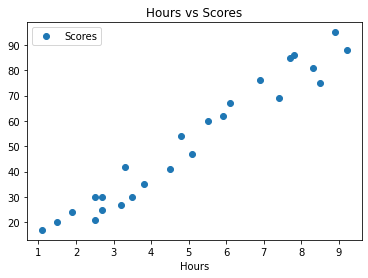

In [7]:
#SCATTER PLOT- to plot the relation between hours and scores
import matplotlib.pyplot as plt
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')   


In [8]:
#SPLITTING INTO INPUT AND OUTPUTS
T = df.iloc[:, :1].values  
V = df.iloc[:, -1].values  

In [9]:
from sklearn.model_selection import train_test_split  
T_train,T_test,V_train,V_test= train_test_split(T, V,test_size=0.5, random_state=0)
T_train.shape, T_test.shape, V_train.shape, V_test.shape

((12, 1), (13, 1), (12,), (13,))

In [10]:
V_test


array([27, 21, 76, 67, 42, 86, 69, 95, 88, 60, 20, 41, 54], dtype=int64)

In [11]:
#TRAINING THE DATA USING LINEAR REGRESSION
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(T,V)

LinearRegression()

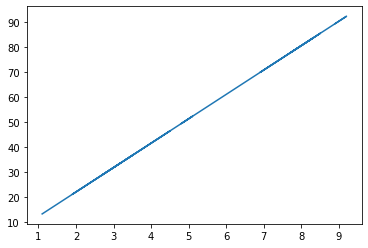

In [12]:
#PLOTTING USING LINE
#COEFF- comapares the co-ordinates coeff to plot the line.
#intercept- compares to plot using intercepts since the hours are in float.
line = regressor.coef_*T+regressor.intercept_
plt.plot(T,line);
plt.show()

In [13]:
 # Testing data - In Hours
V_prediction = regressor.predict(T_test) # Predicting the scores

In [14]:
V_prediction

array([33.76624426, 26.92318188, 69.9367168 , 62.11607409, 34.74382459,
       78.73493985, 74.8246185 , 89.48832358, 92.4210646 , 56.25059205,
       17.14737849, 46.47478866, 49.40752968])

In [15]:
T_test

array([[3.2],
       [2.5],
       [6.9],
       [6.1],
       [3.3],
       [7.8],
       [7.4],
       [8.9],
       [9.2],
       [5.5],
       [1.5],
       [4.5],
       [4.8]])

In [16]:
V_train

array([30, 30, 75, 25, 35, 30, 81, 24, 17, 85, 62, 47], dtype=int64)

In [17]:
V_test

array([27, 21, 76, 67, 42, 86, 69, 95, 88, 60, 20, 41, 54], dtype=int64)

In [18]:
#predicted and original comparison
import pandas as pd
df= pd.DataFrame({'orginal': V_test, 'Predicted': V_prediction})  
df

,orginal,Predicted
0,27,33.766244
1,21,26.923182
2,76,69.936717
3,67,62.116074
4,42,34.743825
5,86,78.734940
6,69,74.824618
7,95,89.488324
8,88,92.421065
9,60,56.250592


In [19]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = 92.9098547701573


In [20]:
from sklearn import metrics  
print('Error:', 
      metrics.mean_absolute_error(V_test, V_prediction)) 

Error: 5.429578365361996
